backtrader allows you to focus on writing reusable trading strategies, indicators and analyzers instead of having to spend time building infrastructure.



https://www.backtrader.com/

In [1]:
from datetime import datetime
import backtrader as bt

<IPython.core.display.Javascript object>


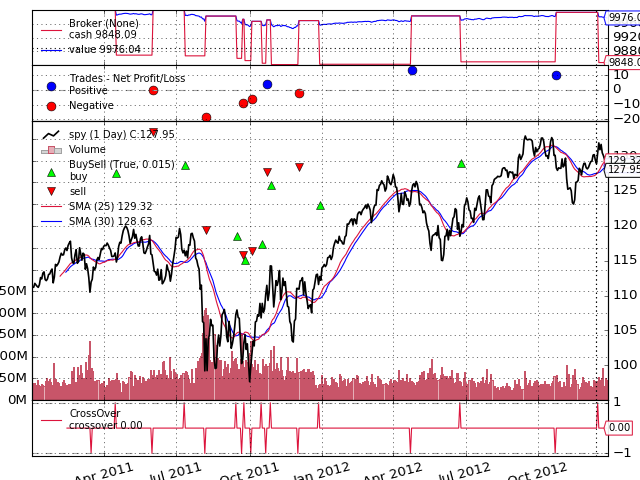

[[<matplotlib.figure.Figure at 0x1084db8d0>]]

In [2]:
class SmaCross(bt.SignalStrategy):
    params = (('pfast', 25), ('pslow', 30),)
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=self.p.pfast), bt.ind.SMA(period=self.p.pslow)
        self.signal_add(bt.SIGNAL_LONG, bt.ind.CrossOver(sma1, sma2))
    
cerebro = bt.Cerebro()
    
data = bt.feeds.YahooFinanceData(dataname='spy', fromdate=datetime(2011, 1, 1),
                                     todate=datetime(2012, 12, 31))
cerebro.adddata(data)

cerebro.addstrategy(SmaCross)
cerebro.run()
cerebro.plot()


In [21]:
from __future__ import (absolute_import,division, print_function, unicode_literals)
import backtrader as bt
import datetime 
import os.path
import sys

In [22]:
class TestStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        'Logging function for this strategy'
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])    
    
    

In [23]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00


FileNotFoundError: [Errno 2] No such file or directory: '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/../../datas/orcl-1995-2014.txt'

In [24]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00


FileNotFoundError: [Errno 2] No such file or directory: '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/../../datas/orcl-1995-2014.txt'